In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,_),(x_test,_)=keras.datasets.mnist.load_data()

In [3]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [4]:
x_train=x_train.reshape((len(x_train),28,28,1))
x_test=x_test.reshape((len(x_test),28,28,1))

In [5]:
latent_dim=64

In [7]:
encoder_inputs=keras.Input(shape=(28,28,1))
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoder_inputs)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Flatten()(x)
latent_space=layers.Dense(latent_dim,activation='relu')(x)

In [8]:
encoder=keras.Model(encoder_inputs,latent_space,name='encoder')

In [9]:
decoder_input=keras.Input(shape=(latent_dim,))
x=layers.Dense(7*7*64,activation='relu')(decoder_input)
x=layers.Reshape((7,7,64))(x)
x=layers.Conv2DTranspose(64,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2DTranspose(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
decoder_output=layers.Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same')(x)

In [10]:
decoder=keras.Model(decoder_input,decoder_output,name='decoder')

In [11]:
autoencoder_inputs=keras.Input(shape=(28,28,1))
encoded=encoder(autoencoder_inputs)
decoded=decoder(encoded)
autoencoder=keras.Model(autoencoder_inputs,decoded,name='autoencoder')

In [12]:
autoencoder.compile(optimizer='adam',loss='mse')

In [13]:
autoencoder.fit(x_train,x_train,epochs=5,batch_size=128,validation_data=(x_test,x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 0.1173 - val_loss: 0.1140
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.1120 - val_loss: 0.1140


In [14]:
def display_reconstructed_images(autoencoder,x_test,n=10):
    decoder_imgs=autoencoder.predict(x_test[:n])
    fig,axes=plt.subplots(2,n,figsize=(20,4))
    for i in range(n):
        axes[0,i].imshow(x_test[i].reshape(28,28),cmap='gray')
        axes[0,i].axis('off')
        axes[1,i].imshow(decoder_imgs[i].reshape(28,28),cmap='gray')
        axes[1,i].axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


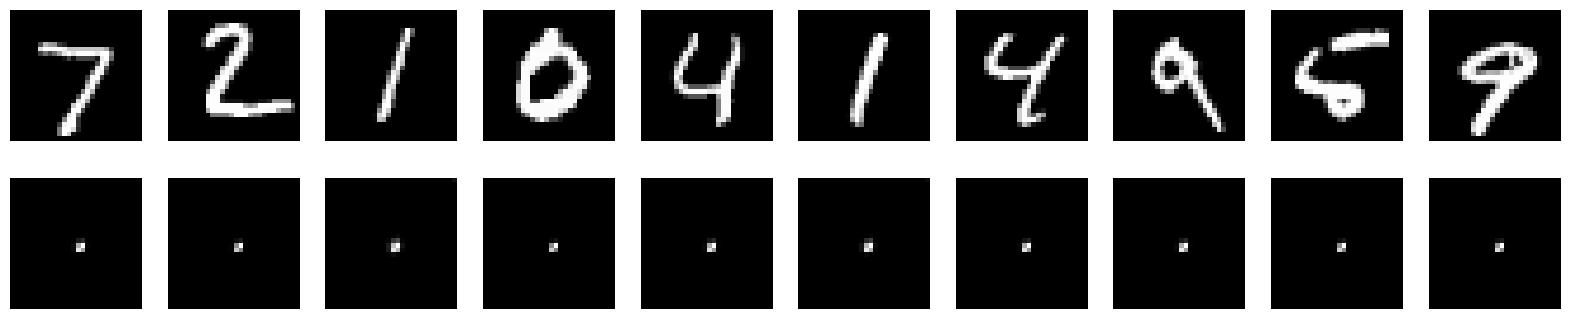

In [15]:
display_reconstructed_images(autoencoder,x_test)